This notebook showcases the usage of the `MBLlearning`-package.
It loads all necessary data and the pretrained model(s) but can also incorporate training the model from scratch.
All follow-up code is used to recreate every plot from the result section in the main text of the arXiv-paper

For additional plots in the appendix (especially the toy model), refer to the `appendix_notebook`

In [1]:
# Load relevant packages, in particular, the MBLlearning-package
# load pytorch for training
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
# load finite-size scaling analysis package
import fssa
# standard libraries for data processing and plotting
import numpy as np
import matplotlib.pyplot as plt
#from mpl_toolkits.mplot3d import axes3d # for 3d plots
import matplotlib as mpl
%matplotlib inline

In [2]:
from MBLlearning.learn_inds.approximation import Approximator
from MBLlearning.learn_inds import recurrent
import MBLlearning.utils as utils
import MBLlearning.utils.plotting as plot

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
from MBLlearning.global_config import get_config, diction
DTYPE, DEVICE = get_config()
NUM_DEVICES = torch.cuda.device_count() if torch.cuda.is_available() else 1
print("Using {} device(s) of type {}".format(NUM_DEVICES,DEVICE))

Using 1 device(s) of type cuda


Training of the RNN-set-up
---

In [24]:
# all relevant hyperparameters and data setting go here

################################################################################################################
# data settings
fileloc = "data/indicators_train_Uniform_L_{}_eps_{}.txt"
L = [10,12,14]
L_small = [10,12] # for quantitative extrapolation testing
L_extra = [16,18] # for qualitative  extrapolation testing
eps = np.arange(1,20)/20
single_inds = [0,3,5]
######## transfer learning indicators #######
init_inds = [0,1]
transfer_inds = [2]
#############################################
sorting = False
N_train = 1000
################################################################################################################
# hyperparameters of the model
feature_size = 8 # single number for RNN feature extractor
depth = 1 # depth of RNN-cell, see documentation of nn.GRU or nn.LSTM
use_LSTM = False # switch between GRU or LSTM cell
hidden_size = [10] # array of hidden dimensions for the hidden layer for fully-connected NN or None-Type
seq_division = 2 # preprocessing tuple size e.g. [h1,h2,h3] --> [(h1,h2),(h2,h3),(h3,h1)]
# training procedure
optimizer = optim.Adam
opt_params = (1e-4,) # learning rate, other parameters left as default
N_epochs = 20
batch_size = 32 # batch size per device
model_name_scheme = "trained_models/large_model_{}_hidden_size_{}_{}.pt" # {full, small, switched} x {rnn, model}
                                                                         # to be filled in
retrain_model = False # checks for availability of existing model file first.
                      # Can be suppressed by setting this to True
retrain_N_trains = False # setting this to True reruns the generation of data for plot 4 in the paper
                         # it is very time-consuming though
N_trains_retrain = np.append(np.arange(1,11),[10,100,1000])
retrain_filename = "mse_N_train/{}_loss_L_{}_N_{}.txt"
N_trains_plot = np.array([1,2,4,10,100,1000])
mute_outputs = False  # verbose level during training
################################################################################################################
# save figures? Provide a folder for the images
save_figures = "plots_paper/" # set to None-Type for no saving of plots
################################################################################################################

Using 1000 per h-value (from initially set 1000)
Using 1000 per h-value (from initially set 1000)
Using 1000 per h-value (from initially set 1000)
Using 1000 per h-value (from initially set 1000)
Using 1000 per h-value (from initially set 1000)
Using 1000 per h-value (from initially set 1000)
Using 1000 per h-value (from initially set 1000)
Using 1000 per h-value (from initially set 1000)
Using 1000 per h-value (from initially set 1000)
Using 1000 per h-value (from initially set 1000)
Using 1000 per h-value (from initially set 1000)
Using 1000 per h-value (from initially set 1000)
Using 1000 per h-value (from initially set 1000)
Using 1000 per h-value (from initially set 1000)
Using 1000 per h-value (from initially set 1000)
Using 1000 per h-value (from initially set 1000)
Using 1000 per h-value (from initially set 1000)
Using 1000 per h-value (from initially set 1000)
Using 1000 per h-value (from initially set 1000)
Using 1000 per h-value (from initially set 1000)
Using 1000 per h-val

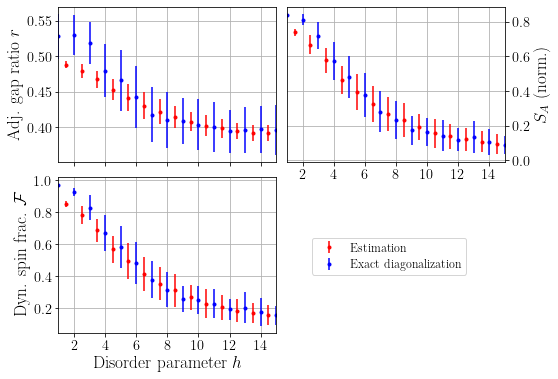

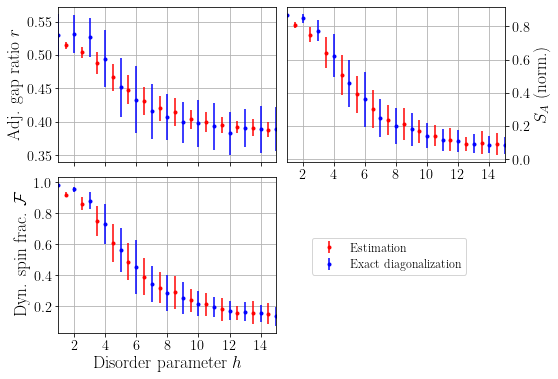

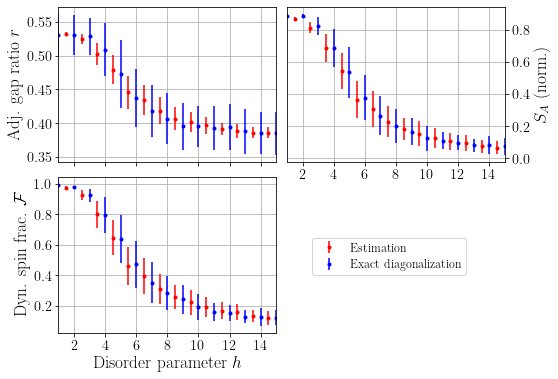

[10, 12, 14]


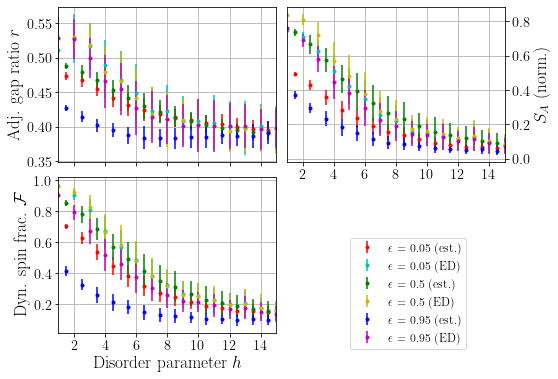

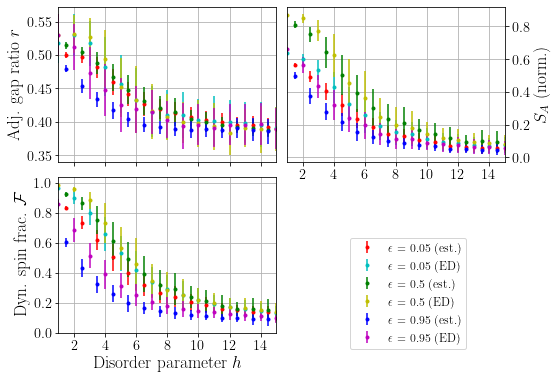

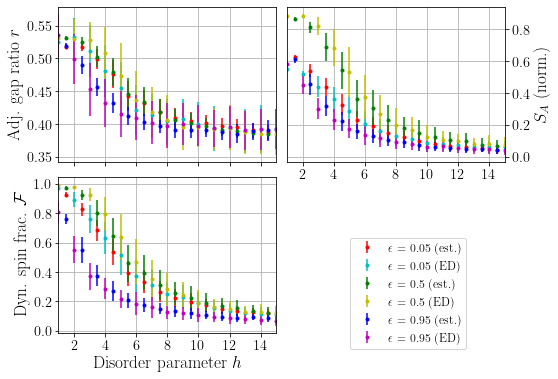

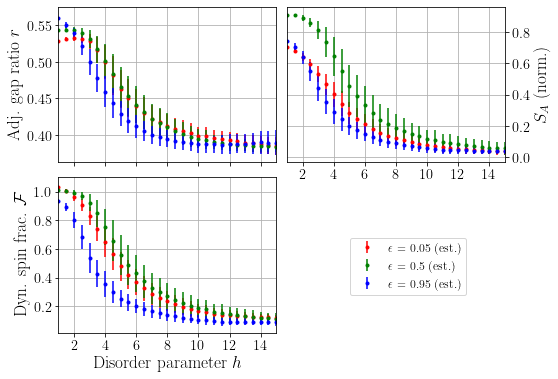

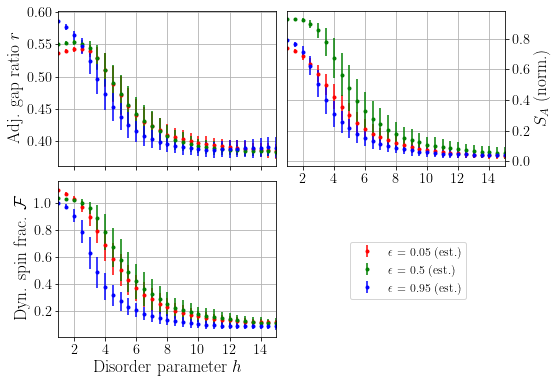

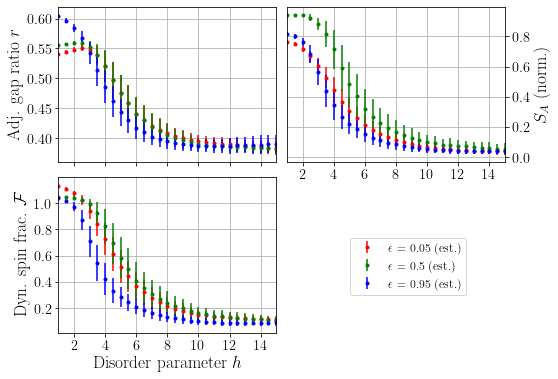

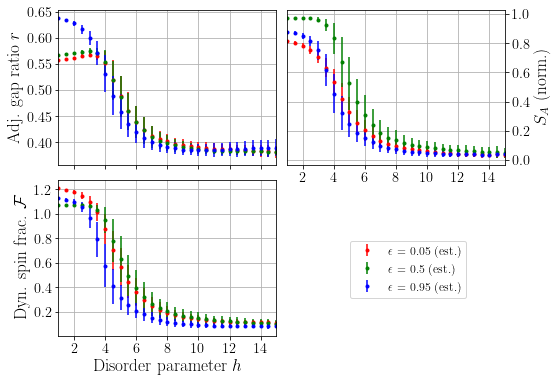

[10, 12, 14]


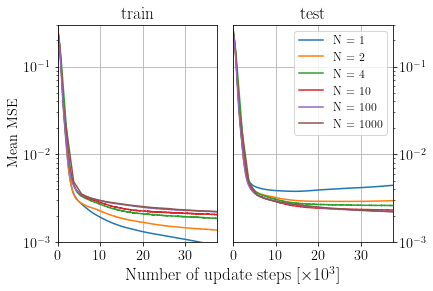

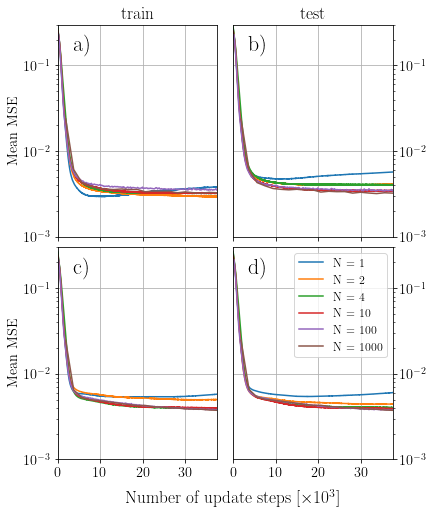

Skipped old code. Check for deletion.
Trying to load model from file ...
Model loaded from file.


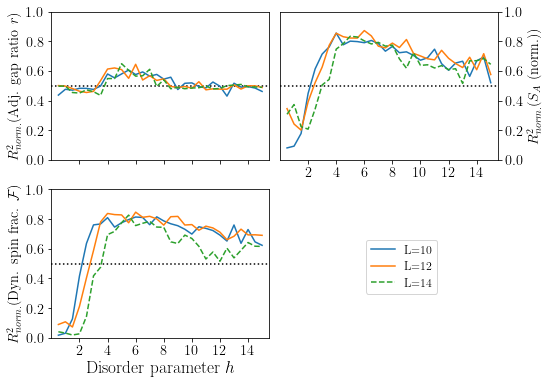

Trying to load model from file ...
Model loaded from file.


/home/alexander/.local/lib/python3.8/site-packages/fssa/fssa.py:165: RuntimeWarning: rho_c is out of range
  warnings.warn("rho_c is out of range", RuntimeWarning)


h_c = 2.82 +/- 0.83
nu  = 1.25 +/- 0.35
chi = -0.03 +/- 0.03


/home/alexander/.local/lib/python3.8/site-packages/fssa/fssa.py:165: RuntimeWarning: rho_c is out of range
  warnings.warn("rho_c is out of range", RuntimeWarning)


h_c = -1.38 +/- 2.15
nu  = 1.03 +/- 0.39
chi = 0.17 +/- 0.05


/home/alexander/.local/lib/python3.8/site-packages/fssa/fssa.py:165: RuntimeWarning: rho_c is out of range
  warnings.warn("rho_c is out of range", RuntimeWarning)
/home/alexander/.local/lib/python3.8/site-packages/fssa/fssa.py:505: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(varco)), varco


h_c = 2.07 +/- nan
nu  = 0.96 +/- nan
chi = 0.12 +/- nan


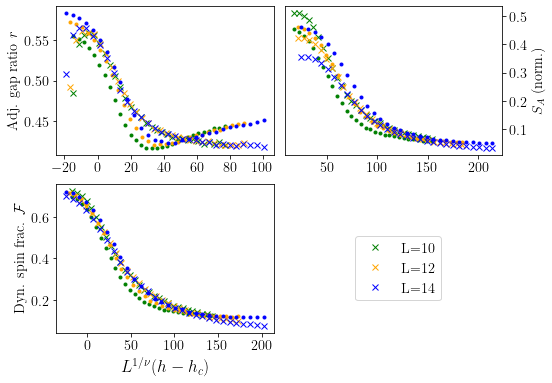

/home/alexander/.local/lib/python3.8/site-packages/fssa/fssa.py:165: RuntimeWarning: rho_c is out of range
  warnings.warn("rho_c is out of range", RuntimeWarning)


h_c = -2.62 +/- 3.42
nu  = 2.32 +/- 1.27
chi = 0.09 +/- 0.10


/home/alexander/.local/lib/python3.8/site-packages/fssa/fssa.py:165: RuntimeWarning: rho_c is out of range
  warnings.warn("rho_c is out of range", RuntimeWarning)


h_c = -1.52 +/- 2.25
nu  = 1.08 +/- 0.39
chi = 0.15 +/- 0.01


/home/alexander/.local/lib/python3.8/site-packages/fssa/fssa.py:165: RuntimeWarning: rho_c is out of range
  warnings.warn("rho_c is out of range", RuntimeWarning)


h_c = 2.00 +/- 4.24
nu  = 0.97 +/- 0.48
chi = 0.14 +/- 1.05


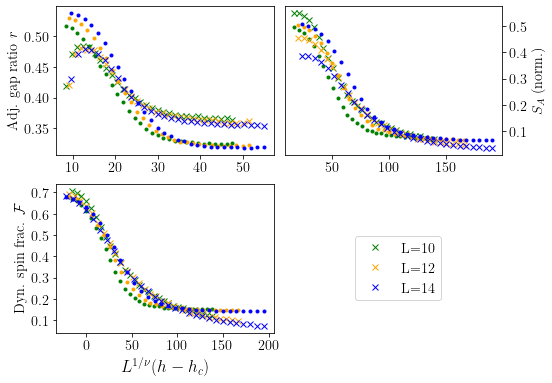

/home/alexander/.local/lib/python3.8/site-packages/fssa/fssa.py:165: RuntimeWarning: rho_c is out of range
  warnings.warn("rho_c is out of range", RuntimeWarning)


h_c = 3.24 +/- 0.65
nu  = 1.24 +/- 0.17
chi = -0.04 +/- 0.02


/home/alexander/.local/lib/python3.8/site-packages/fssa/fssa.py:165: RuntimeWarning: rho_c is out of range
  warnings.warn("rho_c is out of range", RuntimeWarning)


h_c = -1.98 +/- 3.64
nu  = 1.31 +/- 0.53
chi = 0.14 +/- 0.27


/home/alexander/.local/lib/python3.8/site-packages/fssa/fssa.py:165: RuntimeWarning: rho_c is out of range
  warnings.warn("rho_c is out of range", RuntimeWarning)


h_c = 2.10 +/- 0.78
nu  = 1.07 +/- 0.30
chi = 0.13 +/- 0.01


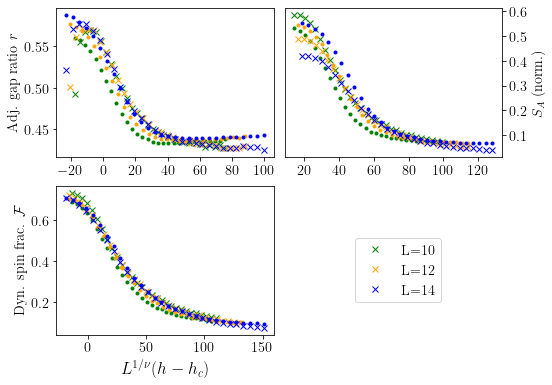

/home/alexander/.local/lib/python3.8/site-packages/fssa/fssa.py:165: RuntimeWarning: rho_c is out of range
  warnings.warn("rho_c is out of range", RuntimeWarning)
/home/alexander/.local/lib/python3.8/site-packages/fssa/fssa.py:505: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(varco)), varco
/home/alexander/.local/lib/python3.8/site-packages/fssa/fssa.py:165: RuntimeWarning: rho_c is out of range
  warnings.warn("rho_c is out of range", RuntimeWarning)


h_c = 4.24 +/- 0.34
nu  = 1.28 +/- nan
chi = -0.08 +/- nan
h_c = -0.22 +/- 0.60
nu  = 1.38 +/- 0.15
chi = 0.12 +/- 0.17


/home/alexander/.local/lib/python3.8/site-packages/fssa/fssa.py:165: RuntimeWarning: rho_c is out of range
  warnings.warn("rho_c is out of range", RuntimeWarning)


h_c = 2.72 +/- 0.46
nu  = 1.12 +/- 0.25
chi = 0.12 +/- 0.02


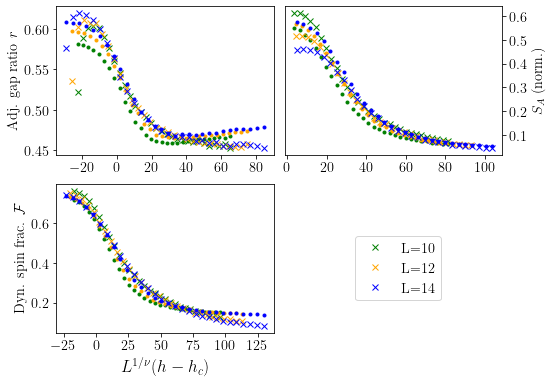

/home/alexander/.local/lib/python3.8/site-packages/fssa/fssa.py:165: RuntimeWarning: rho_c is out of range
  warnings.warn("rho_c is out of range", RuntimeWarning)


h_c = 4.48 +/- 0.67
nu  = 1.10 +/- 0.41
chi = -0.04 +/- 0.06


/home/alexander/.local/lib/python3.8/site-packages/fssa/fssa.py:165: RuntimeWarning: rho_c is out of range
  warnings.warn("rho_c is out of range", RuntimeWarning)


h_c = 1.76 +/- 6.93
nu  = 1.42 +/- 0.78
chi = 0.11 +/- 1.50


/home/alexander/.local/lib/python3.8/site-packages/fssa/fssa.py:165: RuntimeWarning: rho_c is out of range
  warnings.warn("rho_c is out of range", RuntimeWarning)


h_c = 3.60 +/- 3.06
nu  = 1.08 +/- 0.60
chi = 0.12 +/- 0.48


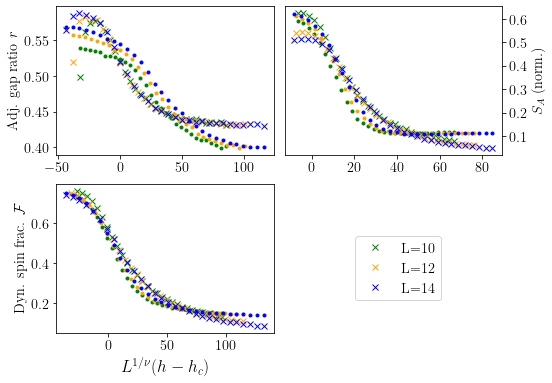

/home/alexander/.local/lib/python3.8/site-packages/fssa/fssa.py:165: RuntimeWarning: rho_c is out of range
  warnings.warn("rho_c is out of range", RuntimeWarning)


h_c = 5.32 +/- 0.46
nu  = 1.05 +/- 0.09
chi = -0.05 +/- 0.03


/home/alexander/.local/lib/python3.8/site-packages/fssa/fssa.py:165: RuntimeWarning: rho_c is out of range
  warnings.warn("rho_c is out of range", RuntimeWarning)


h_c = 3.79 +/- 1.49
nu  = 1.22 +/- 0.59
chi = 0.11 +/- 0.29
h_c = 4.29 +/- 0.80
nu  = 1.08 +/- 0.32
chi = 0.11 +/- 0.15


/home/alexander/.local/lib/python3.8/site-packages/fssa/fssa.py:165: RuntimeWarning: rho_c is out of range
  warnings.warn("rho_c is out of range", RuntimeWarning)


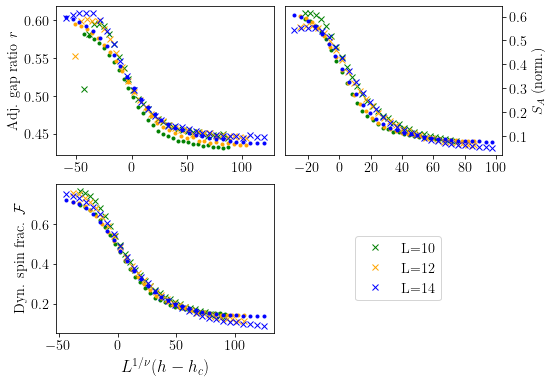

/home/alexander/.local/lib/python3.8/site-packages/fssa/fssa.py:165: RuntimeWarning: rho_c is out of range
  warnings.warn("rho_c is out of range", RuntimeWarning)


h_c = 10.59 +/- 0.83
nu  = 2.58 +/- 1.21
chi = -0.31 +/- 0.12
h_c = 4.76 +/- 0.54
nu  = 1.00 +/- 0.52
chi = 0.09 +/- 0.07
h_c = 7.39 +/- 0.45
nu  = 0.96 +/- 0.15
chi = -0.43 +/- 0.11


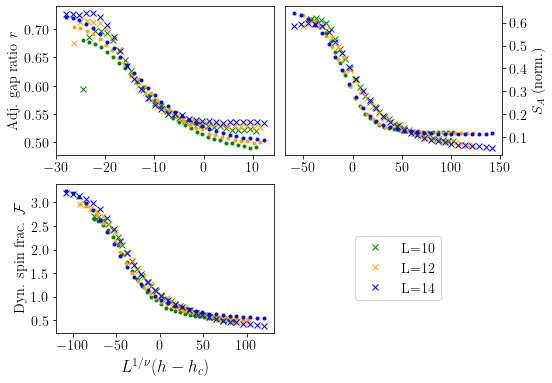

/home/alexander/.local/lib/python3.8/site-packages/fssa/fssa.py:165: RuntimeWarning: rho_c is out of range
  warnings.warn("rho_c is out of range", RuntimeWarning)


h_c = 13.85 +/- 5.52
nu  = 3.11 +/- 1.62
chi = -0.45 +/- 0.37
h_c = 5.07 +/- 0.17
nu  = 0.96 +/- 0.21
chi = 0.11 +/- 0.03
h_c = 4.98 +/- 0.25
nu  = 0.90 +/- 0.19
chi = 0.11 +/- 0.02


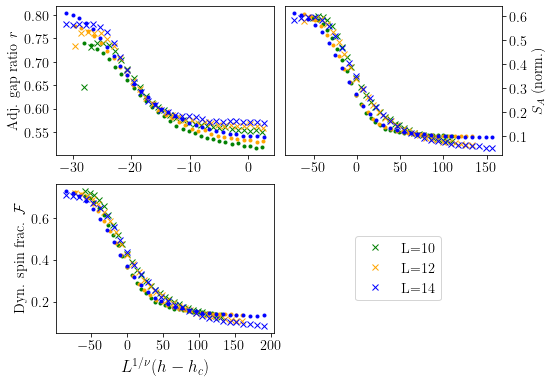

/home/alexander/.local/lib/python3.8/site-packages/fssa/fssa.py:165: RuntimeWarning: rho_c is out of range
  warnings.warn("rho_c is out of range", RuntimeWarning)


h_c = 5.90 +/- 1.69
nu  = 0.91 +/- 0.49
chi = -0.04 +/- 0.09
h_c = 5.31 +/- 0.53
nu  = 0.89 +/- 0.18
chi = 0.08 +/- 0.17
h_c = 5.56 +/- 0.36
nu  = 0.81 +/- 0.12
chi = 0.01 +/- 0.09


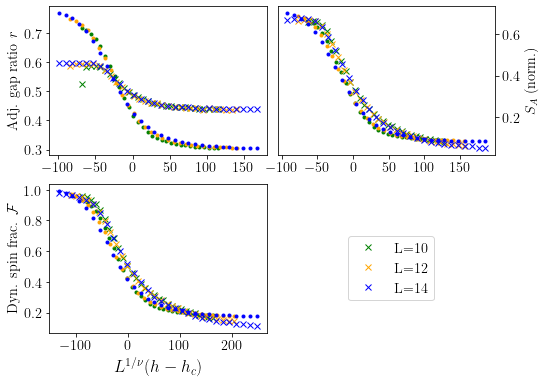

/home/alexander/.local/lib/python3.8/site-packages/fssa/fssa.py:165: RuntimeWarning: rho_c is out of range
  warnings.warn("rho_c is out of range", RuntimeWarning)


h_c = 27.67 +/- 50.76
nu  = 7.63 +/- 18.50
chi = -1.15 +/- 2.70
h_c = 5.19 +/- 1.46
nu  = 0.90 +/- 0.17
chi = 0.11 +/- 0.38
h_c = 5.07 +/- 0.15
nu  = 0.83 +/- 0.18
chi = 0.11 +/- 0.08


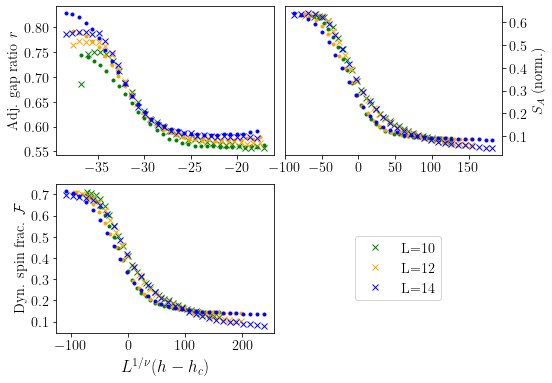

/home/alexander/.local/lib/python3.8/site-packages/fssa/fssa.py:165: RuntimeWarning: rho_c is out of range
  warnings.warn("rho_c is out of range", RuntimeWarning)


h_c = 5.25 +/- 0.40
nu  = 0.73 +/- 0.13
chi = -0.01 +/- 0.02
h_c = 5.04 +/- 1.37
nu  = 0.88 +/- 0.15
chi = 0.11 +/- 0.31
h_c = 4.87 +/- 0.35
nu  = 0.74 +/- 0.14
chi = 0.12 +/- 0.03


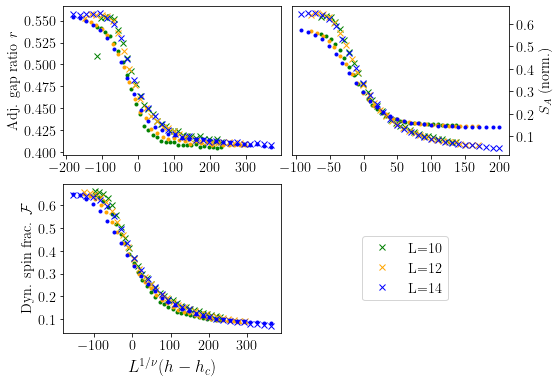

/home/alexander/.local/lib/python3.8/site-packages/fssa/fssa.py:165: RuntimeWarning: rho_c is out of range
  warnings.warn("rho_c is out of range", RuntimeWarning)


h_c = 5.66 +/- 1.36
nu  = 0.84 +/- 0.44
chi = -0.05 +/- 0.08
h_c = 4.77 +/- 2.10
nu  = 0.84 +/- 0.19
chi = 0.11 +/- 0.53
h_c = 4.68 +/- 1.28
nu  = 0.73 +/- 0.14
chi = 0.11 +/- 0.28


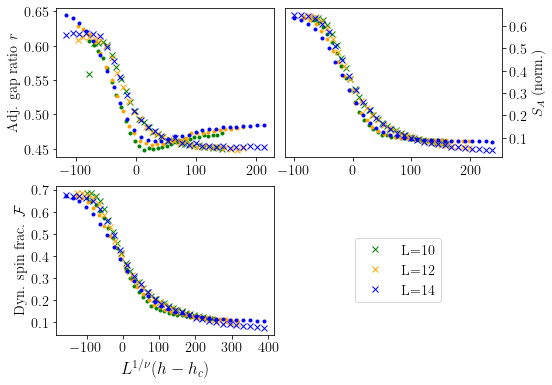

/home/alexander/.local/lib/python3.8/site-packages/fssa/fssa.py:165: RuntimeWarning: rho_c is out of range
  warnings.warn("rho_c is out of range", RuntimeWarning)


h_c = 54620.13 +/- 4317880.30
nu  = 36735.73 +/- 2905200.56
chi = -3947.19 +/- 312174.17
h_c = 4.45 +/- 1.32
nu  = 0.81 +/- 0.17
chi = 0.09 +/- 0.36


/home/alexander/.local/lib/python3.8/site-packages/fssa/fssa.py:165: RuntimeWarning: rho_c is out of range
  warnings.warn("rho_c is out of range", RuntimeWarning)


h_c = 4.44 +/- 1.16
nu  = 0.69 +/- 0.16
chi = 0.07 +/- 0.28


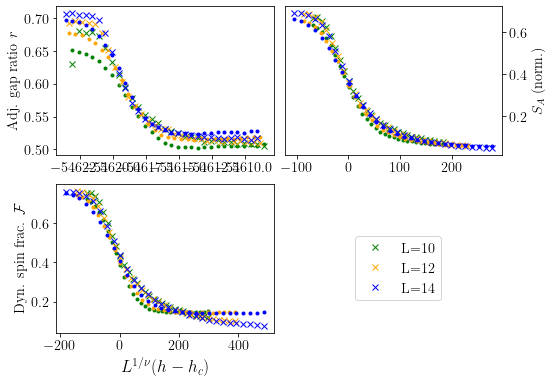

/home/alexander/.local/lib/python3.8/site-packages/fssa/fssa.py:165: RuntimeWarning: rho_c is out of range
  warnings.warn("rho_c is out of range", RuntimeWarning)
/home/alexander/.local/lib/python3.8/site-packages/fssa/fssa.py:505: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(varco)), varco
/home/alexander/.local/lib/python3.8/site-packages/fssa/fssa.py:165: RuntimeWarning: rho_c is out of range
  warnings.warn("rho_c is out of range", RuntimeWarning)


h_c = 5.40 +/- 0.63
nu  = 1.24 +/- nan
chi = -0.11 +/- 0.03
h_c = 3.75 +/- 0.33
nu  = 0.77 +/- 0.21
chi = 0.12 +/- 0.03


/home/alexander/.local/lib/python3.8/site-packages/fssa/fssa.py:165: RuntimeWarning: rho_c is out of range
  warnings.warn("rho_c is out of range", RuntimeWarning)


h_c = 3.73 +/- 0.42
nu  = 0.62 +/- 0.13
chi = 0.12 +/- 0.05


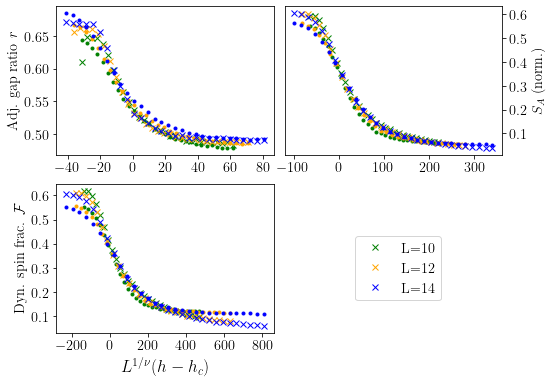

/home/alexander/.local/lib/python3.8/site-packages/fssa/fssa.py:165: RuntimeWarning: rho_c is out of range
  warnings.warn("rho_c is out of range", RuntimeWarning)


h_c = -4.31 +/- 16.10
nu  = 2.79 +/- 5.31
chi = 0.02 +/- 0.37


/home/alexander/.local/lib/python3.8/site-packages/fssa/fssa.py:165: RuntimeWarning: rho_c is out of range
  warnings.warn("rho_c is out of range", RuntimeWarning)


h_c = 2.61 +/- 1.13
nu  = 0.71 +/- 0.28
chi = 0.20 +/- 0.15


/home/alexander/.local/lib/python3.8/site-packages/fssa/fssa.py:165: RuntimeWarning: rho_c is out of range
  warnings.warn("rho_c is out of range", RuntimeWarning)


h_c = 3.17 +/- 0.68
nu  = 0.56 +/- 0.14
chi = 0.07 +/- 0.11


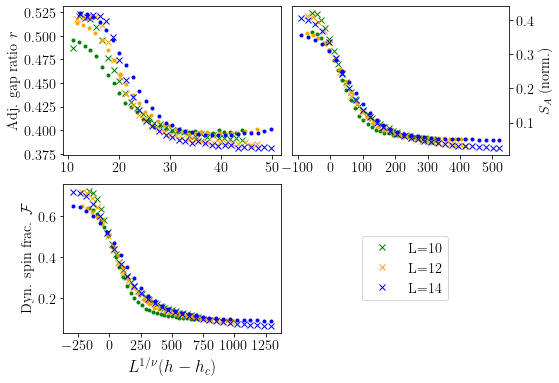

/home/alexander/.local/lib/python3.8/site-packages/fssa/fssa.py:165: RuntimeWarning: rho_c is out of range
  warnings.warn("rho_c is out of range", RuntimeWarning)


h_c = 2.45 +/- 0.88
nu  = 1.93 +/- 0.27
chi = -0.18 +/- 0.06


/home/alexander/.local/lib/python3.8/site-packages/fssa/fssa.py:165: RuntimeWarning: rho_c is out of range
  warnings.warn("rho_c is out of range", RuntimeWarning)


h_c = 1.65 +/- 0.21
nu  = 0.64 +/- 0.07
chi = 0.17 +/- 0.01


/home/alexander/.local/lib/python3.8/site-packages/fssa/fssa.py:165: RuntimeWarning: rho_c is out of range
  warnings.warn("rho_c is out of range", RuntimeWarning)


h_c = 1.42 +/- 1.05
nu  = 0.45 +/- 0.20
chi = 0.34 +/- 0.06


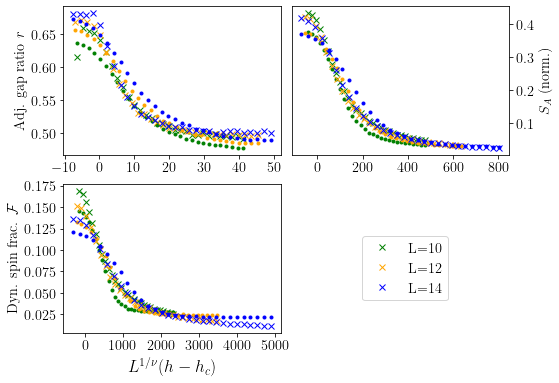

/home/alexander/.local/lib/python3.8/site-packages/fssa/fssa.py:165: RuntimeWarning: rho_c is out of range
  warnings.warn("rho_c is out of range", RuntimeWarning)


h_c = -11.13 +/- 11.97
nu  = 2.63 +/- 3.31
chi = -0.01 +/- 0.35


/home/alexander/.local/lib/python3.8/site-packages/fssa/fssa.py:165: RuntimeWarning: rho_c is out of range
  warnings.warn("rho_c is out of range", RuntimeWarning)
/home/alexander/.local/lib/python3.8/site-packages/fssa/fssa.py:505: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(varco)), varco
/home/alexander/.local/lib/python3.8/site-packages/fssa/fssa.py:165: RuntimeWarning: rho_c is out of range
  warnings.warn("rho_c is out of range", RuntimeWarning)


h_c = -4.63 +/- nan
nu  = 1.32 +/- nan
chi = 0.17 +/- 0.00
h_c = 0.35 +/- 1.59
nu  = 0.41 +/- 0.21
chi = 0.35 +/- 0.12


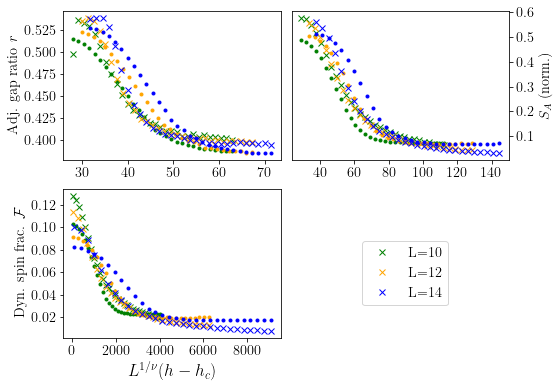

/home/alexander/.local/lib/python3.8/site-packages/fssa/fssa.py:165: RuntimeWarning: rho_c is out of range
  warnings.warn("rho_c is out of range", RuntimeWarning)


h_c = -3.35 +/- 5.55
nu  = 1.89 +/- 1.02
chi = -0.12 +/- 0.05
h_c = 5.33 +/- 0.00
nu  = 1.05 +/- 0.00
chi = 0.11 +/- 0.00


/home/alexander/.local/lib/python3.8/site-packages/fssa/fssa.py:165: RuntimeWarning: rho_c is out of range
  warnings.warn("rho_c is out of range", RuntimeWarning)
/home/alexander/.local/lib/python3.8/site-packages/fssa/fssa.py:505: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(varco)), varco


h_c = 1.11 +/- 0.20
nu  = 0.22 +/- 0.01
chi = 0.39 +/- nan


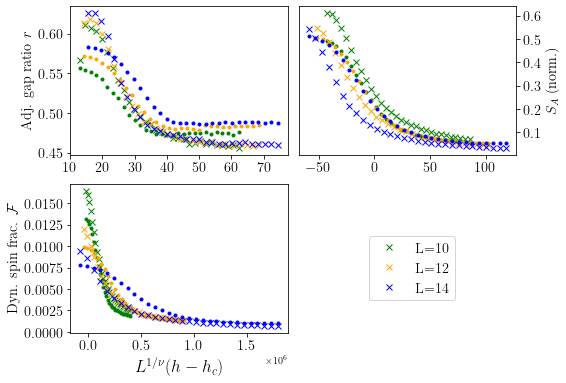

/home/alexander/.local/lib/python3.8/site-packages/fssa/fssa.py:165: RuntimeWarning: rho_c is out of range
  warnings.warn("rho_c is out of range", RuntimeWarning)


h_c = -2.91 +/- 2.82
nu  = 1.68 +/- 0.27
chi = -0.09 +/- 0.04
h_c = 5.33 +/- 0.00
nu  = 1.05 +/- 0.00
chi = 0.11 +/- 0.00


/home/alexander/.local/lib/python3.8/site-packages/fssa/fssa.py:165: RuntimeWarning: rho_c is out of range
  warnings.warn("rho_c is out of range", RuntimeWarning)
/home/alexander/.local/lib/python3.8/site-packages/fssa/fssa.py:441: RuntimeWarning: Mean of empty slice
  np.nanmean(
/home/alexander/.local/lib/python3.8/site-packages/fssa/fssa.py:505: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(varco)), varco


h_c = 0.94 +/- 0.71
nu  = 0.25 +/- 0.06
chi = 0.34 +/- nan


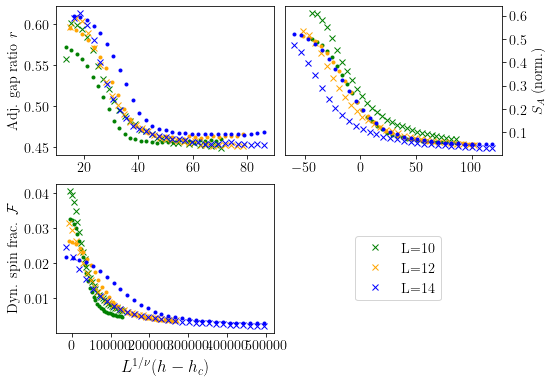

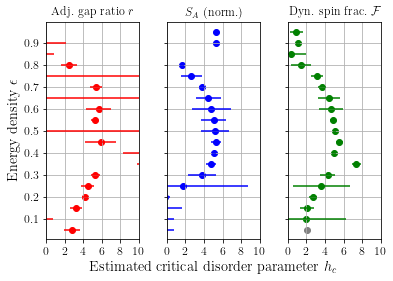

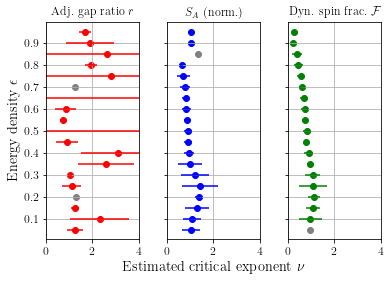

Using L = 10,12,14


/home/alexander/.local/lib/python3.8/site-packages/fssa/fssa.py:165: RuntimeWarning: rho_c is out of range
  warnings.warn("rho_c is out of range", RuntimeWarning)


h_c = 5.93 +/- 0.97
nu  = 2.08 +/- 1.24
chi = 0.01 +/- 0.04
h_c = 5.06 +/- 0.43
nu  = 2.63 +/- 0.79
chi = 0.15 +/- 0.12
h_c = 4.95 +/- 2.10
nu  = 2.26 +/- 0.49
chi = 0.14 +/- 0.53


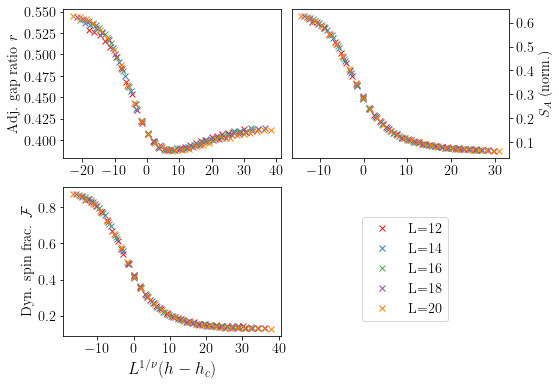

/home/alexander/.local/lib/python3.8/site-packages/fssa/fssa.py:165: RuntimeWarning: rho_c is out of range
  warnings.warn("rho_c is out of range", RuntimeWarning)


h_c = 4.46 +/- 0.11
nu  = 1.43 +/- 0.08
chi = 0.09 +/- 0.04
h_c = 5.00 +/- 0.29
nu  = 2.57 +/- 0.95
chi = 0.13 +/- 0.14
h_c = 5.00 +/- 0.04
nu  = 2.47 +/- 0.97
chi = 0.10 +/- 0.12


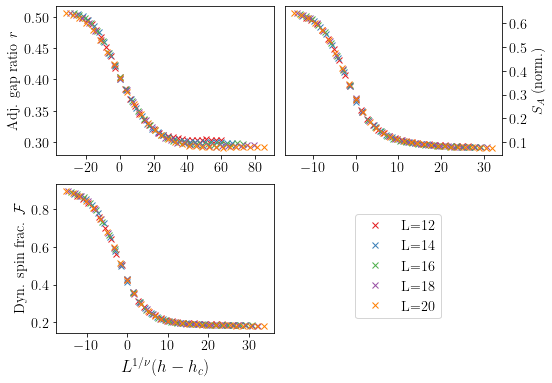

/home/alexander/.local/lib/python3.8/site-packages/fssa/fssa.py:165: RuntimeWarning: rho_c is out of range
  warnings.warn("rho_c is out of range", RuntimeWarning)


h_c = 5.90 +/- 1.47
nu  = 2.39 +/- 1.03
chi = 0.01 +/- 0.07
h_c = 5.00 +/- 0.08
nu  = 2.55 +/- 0.90
chi = 0.13 +/- 0.13


/home/alexander/.local/lib/python3.8/site-packages/fssa/fssa.py:505: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(varco)), varco


h_c = 4.74 +/- nan
nu  = 2.50 +/- 0.79
chi = 0.17 +/- nan


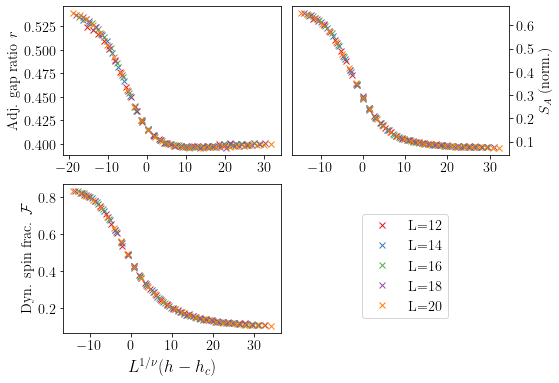

/home/alexander/.local/lib/python3.8/site-packages/fssa/fssa.py:165: RuntimeWarning: rho_c is out of range
  warnings.warn("rho_c is out of range", RuntimeWarning)
/home/alexander/.local/lib/python3.8/site-packages/fssa/fssa.py:505: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(varco)), varco


h_c = 5.76 +/- 0.44
nu  = 2.02 +/- 0.75
chi = 0.01 +/- nan


/home/alexander/.local/lib/python3.8/site-packages/fssa/fssa.py:505: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(varco)), varco


h_c = 5.27 +/- nan
nu  = 2.65 +/- 0.77
chi = 0.07 +/- nan
h_c = 5.00 +/- 0.20
nu  = 2.51 +/- 0.78
chi = 0.10 +/- 0.13


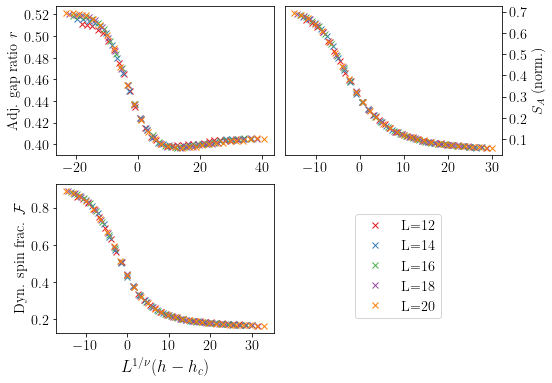

/home/alexander/.local/lib/python3.8/site-packages/fssa/fssa.py:165: RuntimeWarning: rho_c is out of range
  warnings.warn("rho_c is out of range", RuntimeWarning)


h_c = 3.50 +/- 2.85
nu  = 2.46 +/- 1.88
chi = 0.13 +/- 0.15
h_c = 4.90 +/- 0.54
nu  = 2.21 +/- 1.18
chi = 0.12 +/- 0.04
h_c = 4.91 +/- 0.75
nu  = 2.21 +/- 0.39
chi = 0.10 +/- 0.19


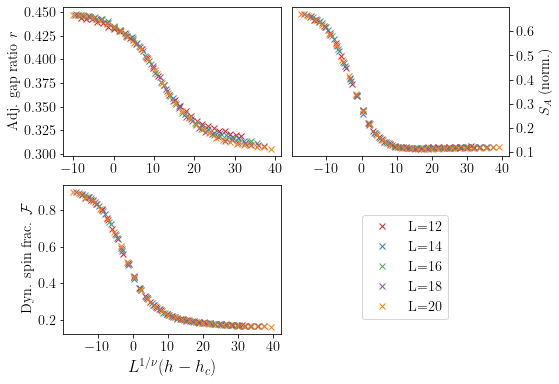

/home/alexander/.local/lib/python3.8/site-packages/fssa/fssa.py:165: RuntimeWarning: rho_c is out of range
  warnings.warn("rho_c is out of range", RuntimeWarning)


h_c = 5.50 +/- 0.29
nu  = 2.82 +/- 1.03
chi = 0.03 +/- 0.03
h_c = 4.90 +/- 1.80
nu  = 2.74 +/- 1.35
chi = 0.13 +/- 0.44
h_c = 5.00 +/- 0.92
nu  = 2.50 +/- 0.76
chi = 0.14 +/- 0.25


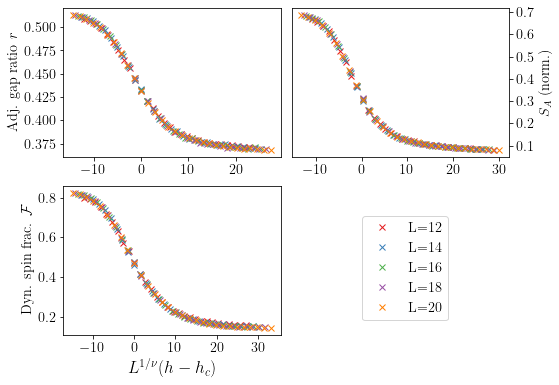

/home/alexander/.local/lib/python3.8/site-packages/fssa/fssa.py:165: RuntimeWarning: rho_c is out of range
  warnings.warn("rho_c is out of range", RuntimeWarning)


h_c = 5.16 +/- 1.96
nu  = 2.64 +/- 0.69
chi = 0.03 +/- 0.08
h_c = 5.00 +/- 0.13
nu  = 2.07 +/- 0.72
chi = 0.06 +/- 0.11
h_c = 4.59 +/- 1.86
nu  = 2.54 +/- 0.57
chi = 0.17 +/- 0.41


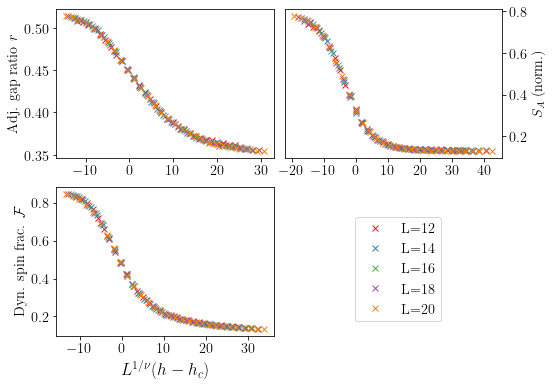

/home/alexander/.local/lib/python3.8/site-packages/fssa/fssa.py:165: RuntimeWarning: rho_c is out of range
  warnings.warn("rho_c is out of range", RuntimeWarning)


h_c = 4.17 +/- 0.95
nu  = 1.75 +/- 0.23
chi = 0.09 +/- 0.05


/home/alexander/.local/lib/python3.8/site-packages/fssa/fssa.py:505: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(varco)), varco


h_c = 5.00 +/- nan
nu  = 2.73 +/- nan
chi = 0.16 +/- 0.09
h_c = 4.94 +/- 0.39
nu  = 2.35 +/- 0.80
chi = 0.15 +/- 0.05


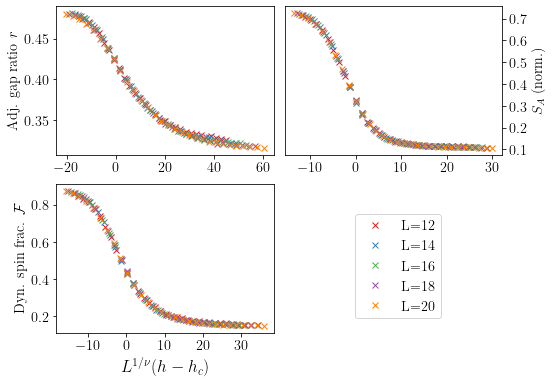

h_c = 4.94 +/- 0.48
nu  = 2.19 +/- 0.41
chi = 0.08 +/- 0.07
h_c = 5.63 +/- 0.89
nu  = 2.55 +/- 0.87
chi = 0.02 +/- 0.10
h_c = 5.00 +/- 0.14
nu  = 2.53 +/- 0.90
chi = 0.11 +/- 0.10


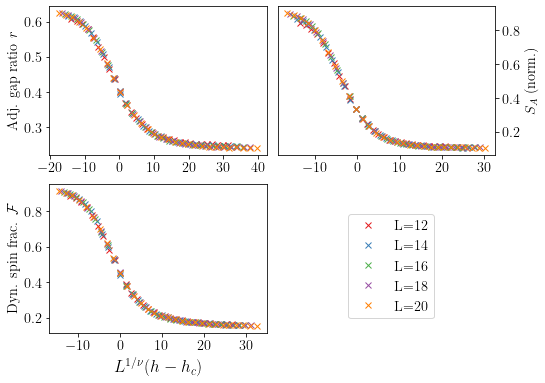

/home/alexander/.local/lib/python3.8/site-packages/fssa/fssa.py:165: RuntimeWarning: rho_c is out of range
  warnings.warn("rho_c is out of range", RuntimeWarning)


h_c = 6.13 +/- 1.22
nu  = 1.71 +/- 0.74
chi = 0.00 +/- 0.06
h_c = 5.21 +/- 0.99
nu  = 2.90 +/- 1.26
chi = 0.10 +/- 0.26
h_c = 4.97 +/- 0.64
nu  = 2.17 +/- 0.37
chi = 0.09 +/- 0.17


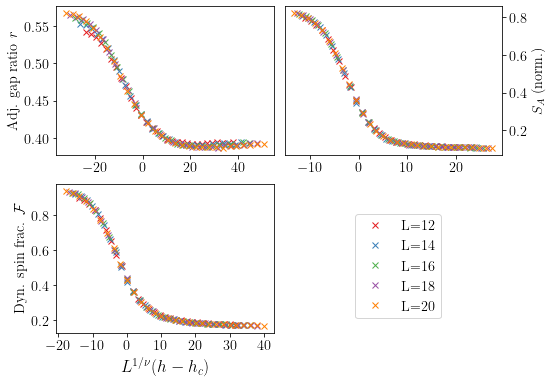

/home/alexander/.local/lib/python3.8/site-packages/fssa/fssa.py:165: RuntimeWarning: rho_c is out of range
  warnings.warn("rho_c is out of range", RuntimeWarning)


h_c = 5.00 +/- 0.22
nu  = 2.95 +/- 1.56
chi = 0.06 +/- 0.05
h_c = 4.90 +/- 0.43
nu  = 2.21 +/- 0.52
chi = 0.12 +/- 0.08
h_c = 4.75 +/- 3.07
nu  = 2.59 +/- 0.83
chi = 0.17 +/- 0.75


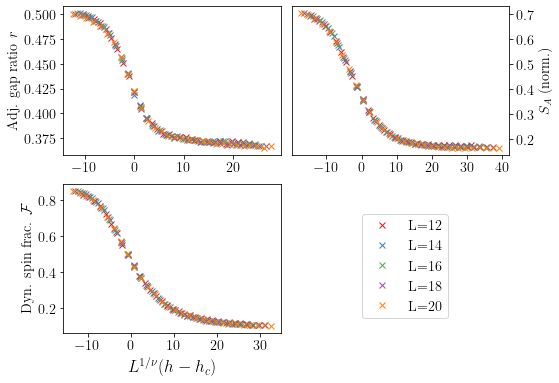

/home/alexander/.local/lib/python3.8/site-packages/fssa/fssa.py:165: RuntimeWarning: rho_c is out of range
  warnings.warn("rho_c is out of range", RuntimeWarning)


h_c = 6.12 +/- 1.58
nu  = 2.99 +/- 2.61
chi = 0.03 +/- 0.05
h_c = 5.00 +/- 1.28
nu  = 2.46 +/- 0.47
chi = 0.06 +/- 0.41
h_c = 4.75 +/- 1.31
nu  = 2.49 +/- 1.14
chi = 0.17 +/- 0.25


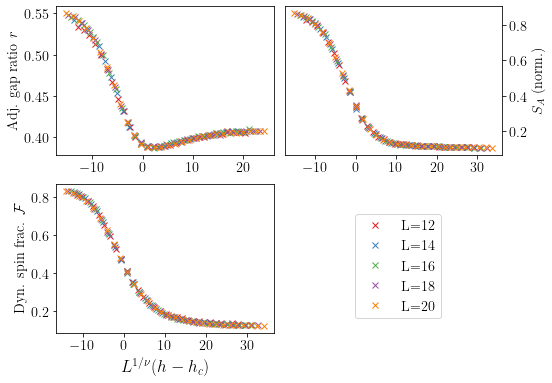

/home/alexander/.local/lib/python3.8/site-packages/fssa/fssa.py:165: RuntimeWarning: rho_c is out of range
  warnings.warn("rho_c is out of range", RuntimeWarning)


h_c = 5.80 +/- 1.22
nu  = 2.08 +/- 1.12
chi = 0.03 +/- 0.03
h_c = 5.55 +/- 1.77
nu  = 2.59 +/- 0.84
chi = 0.01 +/- 0.59
h_c = 5.32 +/- 1.19
nu  = 2.47 +/- 1.27
chi = 0.11 +/- 0.15


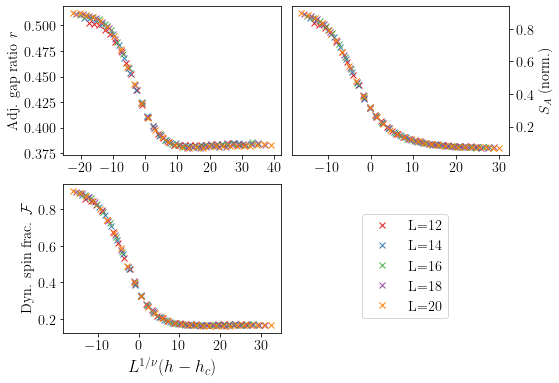

/home/alexander/.local/lib/python3.8/site-packages/fssa/fssa.py:165: RuntimeWarning: rho_c is out of range
  warnings.warn("rho_c is out of range", RuntimeWarning)


h_c = 4.98 +/- 0.58
nu  = 1.67 +/- 0.14
chi = 0.01 +/- 0.02


/home/alexander/.local/lib/python3.8/site-packages/fssa/fssa.py:505: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(varco)), varco


h_c = 5.00 +/- 0.24
nu  = 2.46 +/- 0.78
chi = 0.12 +/- nan
h_c = 5.00 +/- 0.07
nu  = 2.46 +/- 0.87
chi = 0.07 +/- 0.12


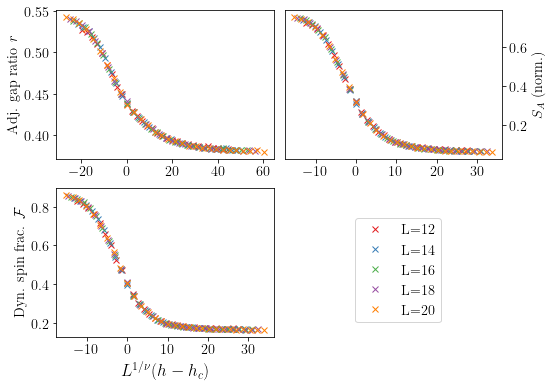

/home/alexander/.local/lib/python3.8/site-packages/fssa/fssa.py:165: RuntimeWarning: rho_c is out of range
  warnings.warn("rho_c is out of range", RuntimeWarning)


h_c = 7.00 +/- 1.50
nu  = 1.96 +/- 1.00
chi = -0.03 +/- 0.05
h_c = 4.84 +/- 0.56
nu  = 2.24 +/- 0.84
chi = 0.13 +/- 0.04
h_c = 5.00 +/- 0.92
nu  = 2.58 +/- 0.86
chi = 0.08 +/- 0.31


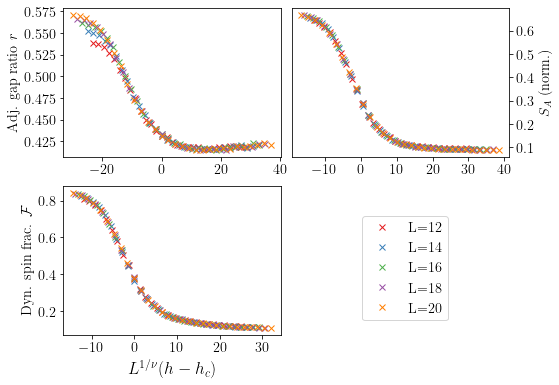

/home/alexander/.local/lib/python3.8/site-packages/fssa/fssa.py:165: RuntimeWarning: rho_c is out of range
  warnings.warn("rho_c is out of range", RuntimeWarning)
/home/alexander/.local/lib/python3.8/site-packages/fssa/fssa.py:505: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(varco)), varco


h_c = 4.91 +/- 0.71
nu  = 2.02 +/- nan
chi = 0.03 +/- 0.02
h_c = 4.94 +/- 0.55
nu  = 2.71 +/- 1.03
chi = 0.13 +/- 0.05
h_c = 5.00 +/- 0.07
nu  = 2.43 +/- 1.05
chi = 0.08 +/- 0.13


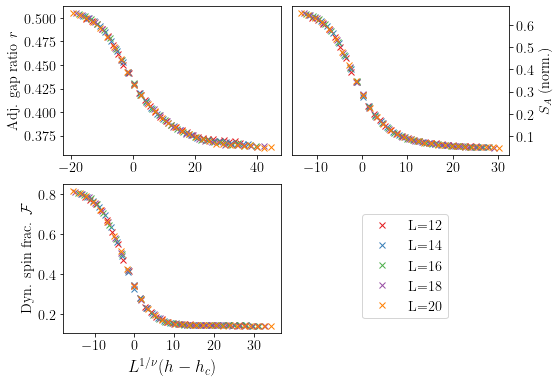

/home/alexander/.local/lib/python3.8/site-packages/fssa/fssa.py:165: RuntimeWarning: rho_c is out of range
  warnings.warn("rho_c is out of range", RuntimeWarning)
/home/alexander/.local/lib/python3.8/site-packages/fssa/fssa.py:505: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(varco)), varco


h_c = 4.95 +/- 0.91
nu  = 2.18 +/- nan
chi = 0.04 +/- 0.03
h_c = 5.16 +/- 0.54
nu  = 2.19 +/- 0.49
chi = 0.11 +/- 0.19
h_c = 5.00 +/- 0.01
nu  = 2.46 +/- 0.90
chi = 0.12 +/- 0.11


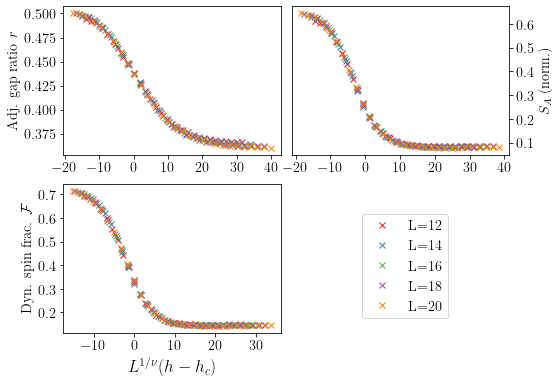

/home/alexander/.local/lib/python3.8/site-packages/fssa/fssa.py:165: RuntimeWarning: rho_c is out of range
  warnings.warn("rho_c is out of range", RuntimeWarning)


h_c = 5.70 +/- 0.72
nu  = 1.75 +/- 0.92
chi = 0.02 +/- 0.03
h_c = 4.72 +/- 1.63
nu  = 2.32 +/- 0.68
chi = 0.17 +/- 0.50
h_c = 4.80 +/- 0.63
nu  = 2.49 +/- 1.05
chi = 0.14 +/- 0.08


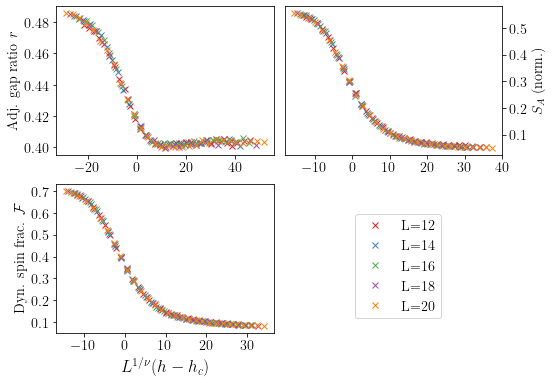

/home/alexander/.local/lib/python3.8/site-packages/fssa/fssa.py:165: RuntimeWarning: rho_c is out of range
  warnings.warn("rho_c is out of range", RuntimeWarning)


h_c = 6.52 +/- 0.81
nu  = 2.31 +/- 1.25
chi = 0.01 +/- 0.03
h_c = 5.63 +/- 0.52
nu  = 2.67 +/- 0.88
chi = 0.02 +/- 0.23


/home/alexander/.local/lib/python3.8/site-packages/fssa/fssa.py:505: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(varco)), varco


h_c = 5.06 +/- nan
nu  = 2.75 +/- 0.72
chi = 0.06 +/- nan


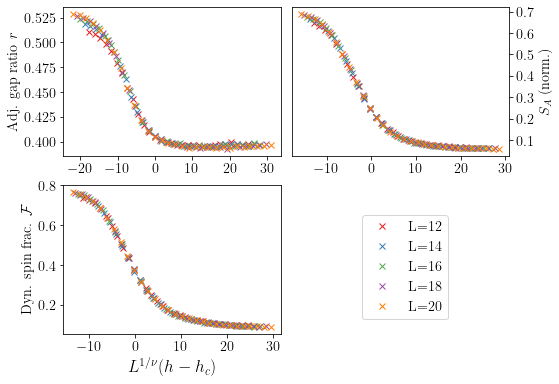

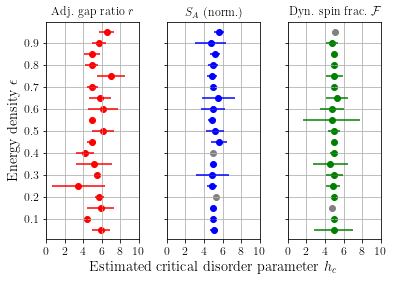

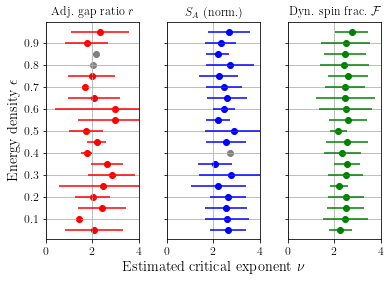

Using 1000 per h-value (from initially set 1000)
Using 1000 per h-value (from initially set 1000)
Using 1000 per h-value (from initially set 1000)
Using 1000 per h-value (from initially set 1000)
Using 1000 per h-value (from initially set 1000)
Using 1000 per h-value (from initially set 1000)
Using 1000 per h-value (from initially set 1000)
Using 1000 per h-value (from initially set 1000)
Using 1000 per h-value (from initially set 1000)
Using 1000 per h-value (from initially set 1000)
Using 1000 per h-value (from initially set 1000)
Using 1000 per h-value (from initially set 1000)
Using 1000 per h-value (from initially set 1000)
Using 1000 per h-value (from initially set 1000)
Using 1000 per h-value (from initially set 1000)
Using 1000 per h-value (from initially set 1000)
Using 1000 per h-value (from initially set 1000)
Using 1000 per h-value (from initially set 1000)
Using 1000 per h-value (from initially set 1000)
Using 1000 per h-value (from initially set 1000)
Using 1000 per h-val

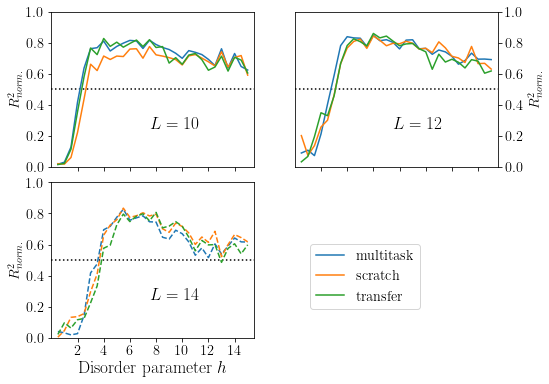

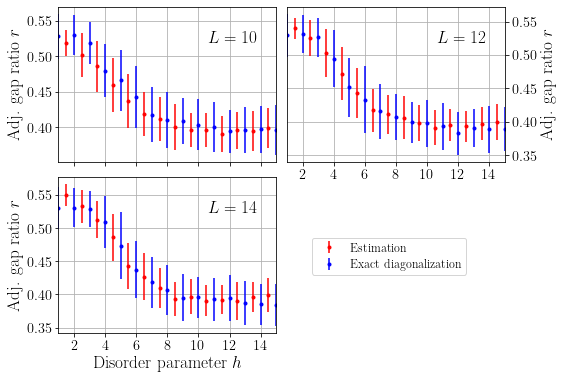

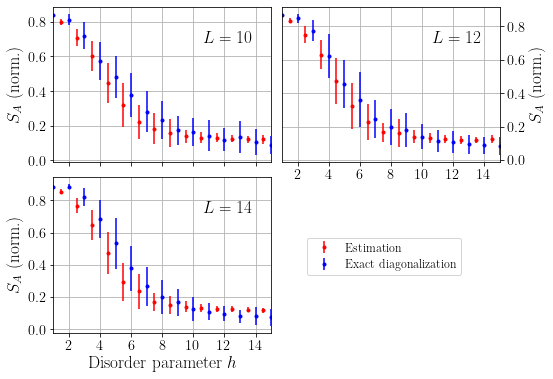

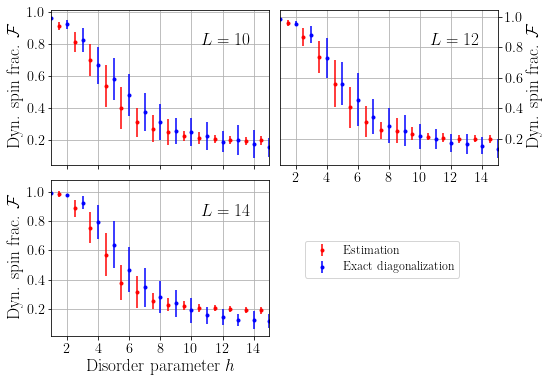

In [25]:

neural_net = Approximator(L,energies=eps)
# data loading and model init
neural_net.set_up(fileloc,
                  rnn_params=(feature_size,depth),
                  model_params=hidden_size,
                  seq_division=seq_division,
                  use_LSTM=use_LSTM,
                  learn_single_ind=single_inds,
                  N_train=N_train)
# resets the model parameters but can also be used for altering the model architecture
neural_net.reset_model()
# regardless of training, set the optimizer and its parameters
neural_net.optimizer = optimizer
neural_net.opt_params = opt_params

print()
print("Hidden size =",hidden_size[0])
model_name = model_name_scheme.format("full",hidden_size[0],"{}") # fill in first place-holder
neural_net.reset_model()
if retrain_model:
    print("Retraining model from scratch ...")
    neural_net.train(epochs=N_epochs,
                     batch_size=batch_size*NUM_DEVICES,
                     mute_outputs=mute_outputs)
    print("Retraining finished, saving to file.")
    neural_net.save(model_name)
else:
    print("Trying to load model from file ...")
    try:
        neural_net.load(model_name)
    except:
        print("File not found, training the model ...")
        neural_net.train(epochs=N_epochs,
                     batch_size=batch_size*NUM_DEVICES,
                     mute_outputs=mute_outputs)
        print("Training finished, saving to file.")
        neural_net.save(model_name)
    else:
        print("Model loaded from file.")

# print the number of parameters in the RNN and the consecutive model
neural_net.num_params()

# create plot 3 in paper
temp = None if save_figures is None else save_figures + "indicator_plot_{}"

plot.plot_inds(neural_net,label_idxs=single_inds,savename=temp)

print(neural_net.Lvals)
plot.plot_inds_extrapolation(neural_net,[10,12,14,16,18,20,30],eps,label_idxs=single_inds)
print(neural_net.Lvals)

# check whether to retrain data with reduced N_train but increased N_epochs
# by default, load from file
if retrain_N_trains:
    N_max = max(N_trains_retrain)
    num_reps = 2

    #mses = np.zeros((num_reps,len(N_trains),len(L)))
    losses = []

    for i,N in enumerate(N_trains_retrain):
        # set up network
        temp_losses = []
        temp_net = Approximator(L,energies=eps)
        temp_net.set_up(fileloc,
                        rnn_params=(feature_size,depth),
                        model_params=hidden_sizes,
                        seq_division=seq_division,
                        use_LSTM=use_LSTM,
                        learn_single_ind=single_inds,
                        N_train=N)

        temp_net.optimizer = optimizer
        temp_net.opt_params = opt_params

        for k in range(num_reps):            
            temp = np.infty
            while temp > 1:
                # retry if training does not succeed which is visible in a high loss
                temp_net.reset_model()
                temp_net.Lvals = L_small # train only on smaller data file
                temp_epochs = int(N_epochs*N_max/N)
                temp_N = len(temp_net.data[L[0]]["train"]["hcorr"])
                print("Training with {} data points for {} epochs".format(temp_N,temp_epochs))
                _, loss_curve = temp_net.train(temp_epochs,batch_size*NUM_DEVICES,mute_outputs=True,L_tests=L)
                temp_net.Lvals = L # test on all test data
                temp = np.mean(loss_curve[0,-1]) # retry if final loss is above threshold
                #for j,l in enumerate(L):
                #    h, singlescores, targets = temp_net.predict(l)
                #    mse = ((singlescores-targets)**2).mean()
                #    mses[k,i,j] = mse
                #    print("MSE on L={} on the test set was {}".format(l,mse))
                #    temp = mse # retry if too large
            temp_losses.append(loss_curve)
        #mse_avg = np.mean(mses,axis=0)
        #mse_std = np.std(mses,axis=0)/np.sqrt(num_reps)
        losses.append(temp_losses)
    
    # save all losses
    for j,l in enumerate(L):
        for k,key in enumerate(["train","test"]):
            for loss,N in zip(losses,N_trains):
                np.savetxt(retrain_filename.format(key,l,N),np.array(loss)[:,k,:,j].T)
                print(np.array(loss)[:,k,:,j].T.shape)

    
prefactor = len(neural_net.data[L[0]]["train"]["h"])*len(L_small)/batch_size/NUM_DEVICES
# create plot 4 in paper
temp = None if save_figures is None else save_figures + "N_trains_plot_{}"
plot.plot_N_train_losses(12,N_trains_plot,N_epochs,prefactor,retrain_filename,savename=temp)
plot.plot_N_train_losses([10,14],N_trains_plot,N_epochs,prefactor,retrain_filename,savename=temp)

if False:
    # scatter plot losses
    color = ["red","blue","green"]
    temp = len(L)*[None]
    for i,(data,c,l) in enumerate(zip(mses.T,color,L)):
        #mean,std = filtered_statistics(data,threshold=1000)
        for N,dots in zip(N_trains,data):
            temp[i] = plt.scatter(N*np.ones_like(dots),dots,c=c)
    plt.legend(temp,L)
    plt.xscale('log')
    plt.show()    

    # create plot 4 in paper
    linestyles = ["bx","kx",None]
    for l,avg,std,style in zip(L,mse_avg.T,mse_std.T,linestyles):
        if l==14:
            plt.semilogx(N_trains,avg,color="orange",marker="*",label="L={}*".format(l))
            plt.errorbar(N_trains,avg,yerr=std,fmt="none",ecolor="orange")
        else:
            plt.semilogx(N_trains,avg,style,label="L={}".format(l))
            plt.errorbar(N_trains,avg,yerr=std,fmt="none",ecolor=style[0])
    plt.legend(fontsize="x-large")
    plt.xticks(fontsize="x-large")
    plt.yticks(fontsize="x-large")
    plt.ylabel("Mean MSE",fontsize="x-large")
    plt.xlabel("$N_{train}$ per disorder parameter $h$",fontsize="x-large")
    if save_figures is not None:
        plt.savefig(save_figures+"mse_N_train.pdf",orientation="landscape",dpi=600,bbox_inches="tight")
    plt.show()
else:
    print("Skipped old code. Check for deletion.")

# checks whether to (re)train the model or to load from file on smaller training data
model_name = model_name_scheme.format("small",hidden_size[0],"{}") # fill in first place-holder
if retrain_model:
    neural_net.Lvals = L_small # for training purposes
    print("Retraining model from scratch ...")
    neural_net.reset_model()
    neural_net.train(epochs=N_epochs,
                     batch_size=batch_size*NUM_DEVICES,
                     mute_outputs=mute_outputs)
    print("Retraining finished, saving to file.")
    neural_net.save(model_name)
    neural_net.Lvals = L # for full test set analysis
else:
    print("Trying to load model from file ...")
    try:
        neural_net.load(model_name)
    except:
        neural_net.Lvals = L_small # for training purposes
        print("File not found, training the model ...")
        neural_net.reset_model()
        neural_net.train(epochs=N_epochs,
                     batch_size=batch_size*NUM_DEVICES,
                     mute_outputs=mute_outputs)
        print("Training finished, saving to file.")
        neural_net.save(model_name)
        neural_net.Lvals = L # for full test set analysis
    else:
        print("Model loaded from file.")

# coefficient of determination on smaller training set (plot 5 in paper)
temp = None if save_figures is None else save_figures + "coefficient_of_determination"
fit_params = plot.plot_r2(neural_net,label_idxs=single_inds,savename=temp)

# FSSA
neural_net.swap_datasets()
neural_net.reset_model()
# check whether to retrain or load from file
model_name = model_name_scheme.format("fssa",hidden_size[0],"{}") # fill in first place-holder
if retrain_model:
    neural_net.Lvals = L_small # for training purposes
    neural_net.reset_model()
    print("Retraining model from scratch ...")
    neural_net.train(epochs=N_epochs,
                     batch_size=batch_size*NUM_DEVICES,
                     mute_outputs=mute_outputs)
    print("Retraining finished, saving to file.")
    neural_net.save(model_name)
    neural_net.Lvals = L # for full test set analysis
else:
    print("Trying to load model from file ...")
    try:
        neural_net.load(model_name)
    except:
        neural_net.Lvals = L_small # for training purposes
        print("File not found, training the model ...")
        neural_net.reset_model()
        neural_net.train(epochs=N_epochs,
                     batch_size=batch_size*NUM_DEVICES,
                     mute_outputs=mute_outputs)
        print("Training finished, saving to file.")
        neural_net.save(model_name)
        neural_net.Lvals = L # for full test set analysis
    else:
        print("Model loaded from file.")

# create plot 6 in paper
temp = None if save_figures is None else save_figures + "fssa_consistency"
fit_params = plot.plot_vanilla_fssa(neural_net,label_idxs=single_inds,savename=temp)

# create plot 7 in paper
temp = None if save_figures is None else save_figures + "fssa_extrapolate"
fit_params = plot.plot_extrapolated_fssa(neural_net,label_idxs=single_inds,savename=temp)

# transfer learning. Train on two indicators first, then drop the post-processing model
# Finally, retrain on the third indicator
# Reset data mess from FSSA
transfer_net = Approximator(L,energies=eps)
# data loading and model init
transfer_net.set_up(fileloc,
                  rnn_params=(feature_size,depth),
                  model_params=hidden_size,
                  seq_division=seq_division,
                  use_LSTM=use_LSTM,
                  learn_single_ind=single_inds,
                  N_train=N_train)
transfer_net.reset_model()
transfer_net.optimizer = optimizer
transfer_net.opt_params = opt_params
# check whether to retrain or load from file for initial training
model_name = model_name_scheme.format("transfer_init",hidden_size[0],"{}") # fill in first place-holder
if retrain_model:
    transfer_net.Lvals = L_small # for training purposes
    print("Retraining model from scratch ...")
    transfer_net.train(epochs=N_epochs,
                     batch_size=batch_size*NUM_DEVICES,
                     mute_outputs=mute_outputs,
                     single_inds=init_inds
                    )
    print("Retraining finished, saving to file.")
    transfer_net.save(model_name)
    transfer_net.Lvals = L # for full test set analysis
else:
    print("Trying to load model from file ...")
    N_inds = transfer_net.N_inds
    try:
        # juggle with the number of indicators for loading procedure
        transfer_net.N_inds = len(init_inds)
        transfer_net.reset_model()
        transfer_net.load(model_name)
    except:
        transfer_net.N_inds = N_inds
        transfer_net.Lvals = L_small # for training purposes
        print("File not found, training the model ...")
        transfer_net.train(epochs=N_epochs,
                         batch_size=batch_size*NUM_DEVICES,
                         mute_outputs=mute_outputs,
                         single_inds=init_inds
                        )
        print("Training finished, saving to file.")
        transfer_net.save(model_name)
        transfer_net.Lvals = L # for full test set analysis
    else:
        transfer_net.N_inds = N_inds
        print("Model loaded from file.")
# check whether to retrain or load from file for transfer training
model_name = model_name_scheme.format("transfer",hidden_size[0],"{}") # fill in first place-holder
if retrain_model:
    transfer_net.Lvals = L_small # for training purposes
    print("Retraining model from scratch ...")
    transfer_net.train_transfer(ind_idxs=transfer_inds,
                     epochs=N_epochs,
                     batch_size=batch_size*NUM_DEVICES,
                     mute_outputs=mute_outputs
                    )
    print("Retraining finished, saving to file.")
    transfer_net.save(model_name)
    transfer_net.Lvals = L # for full test set analysis
else:
    print("Trying to load model from file ...")
    N_inds = transfer_net.N_inds
    try:
        # juggle with the number of indicators for loading procedure
        transfer_net.N_inds = len(transfer_inds)
        transfer_net.reset_model()
        transfer_net.load(model_name)
    except:
        transfer_net.N_inds = N_inds
        transfer_net.Lvals = L_small # for training purposes
        print("File not found, training the model ...")
        transfer_net.train_transfer(ind_idxs=transfer_inds,
                         epochs=N_epochs,
                         batch_size=batch_size*NUM_DEVICES,
                         mute_outputs=mute_outputs
                        )
        print("Training finished, saving to file.")
        transfer_net.save(model_name)
        transfer_net.Lvals = L # for full test set analysis
    else:
        transfer_net.N_inds = N_inds
        print("Model loaded from file.")

# set-up adversial network that learns the transfer indicator from scratch
adversary_net = Approximator(L,energies=eps)
# data loading and model init
adversary_net.set_up(fileloc,
                  rnn_params=(feature_size,depth),
                  model_params=hidden_size,
                  seq_division=seq_division,
                  use_LSTM=use_LSTM,
                  learn_single_ind=[single_inds[t] for t in transfer_inds],
                  N_train=N_train)
adversary_net.reset_model()
adversary_net.optimizer = optimizer
adversary_net.opt_params = opt_params
# check whether to retrain or load from file for initial training
model_name = model_name_scheme.format("transfer_adversary",hidden_size[0],"{}") # fill in first place-holder
if retrain_model:
    adversary_net.Lvals = L_small # for training purposes
    print("Retraining model from scratch ...")
    adversary_net.train(epochs=N_epochs,
                     batch_size=batch_size*NUM_DEVICES,
                     mute_outputs=mute_outputs
                    )
    print("Retraining finished, saving to file.")
    adversary_net.save(model_name)
    adversary_net.Lvals = L # for full test set analysis
else:
    print("Trying to load model from file ...")
    try:
        adversary_net.load(model_name)
    except:
        adversary_net.Lvals = L_small # for training purposes
        print("File not found, training the model ...")
        adversary_net.train(epochs=N_epochs,
                         batch_size=batch_size*NUM_DEVICES,
                         mute_outputs=mute_outputs
                        )
        print("Training finished, saving to file.")
        adversary_net.save(model_name)
        adversary_net.Lvals = L # for full test set analysis
    else:
        print("Model loaded from file.")

# reswap data sets for comparison
neural_net.swap_datasets()
# create plot 8 in paper concerning transfer learning
temp = None if save_figures is None else save_figures + "transfer_learning"
plot.plot_r2_comparison(transfer_net,neural_net,adversary_net,transfer_inds,savename=temp)

# create plot 11 from appendix
temp = None if save_figures is None else save_figures + "l_dependence"
plot.plot_L_dependent_regression(neural_net,label_idxs=single_inds,savename=temp)
